Data from 1 - Valmiki Nagar (Bihar).csv:
   S.No                    Candidate                 Party  EVM Votes  \
0     1                  SUNIL KUMAR   Janata Dal (United)     522495   
1     2                 DEEPAK YADAV  Rashtriya Janata Dal     422959   
2     3  PRAVESH KUMAR MISHRA @ ANUP           Independent      23195   
3     4               DINESH AGRAWAL           Independent      19787   
4     5        DURGESH SINGH CHAUHAN   Bahujan Samaj Party      18739   

   Postal Votes  Total Votes  Percentage of votes  
0           927       523422                47.50  
1          1788       424747                38.55  
2            30        23225                 2.11  
3            23        19810                 1.80  
4            77        18816                 1.71  
Data from 10 - Kishanganj.csv:
   S.No         Candidate                                   Party  EVM Votes  \
0     1    MOHAMMAD JAWED                Indian National Congress     402470   
1     2      MUJA

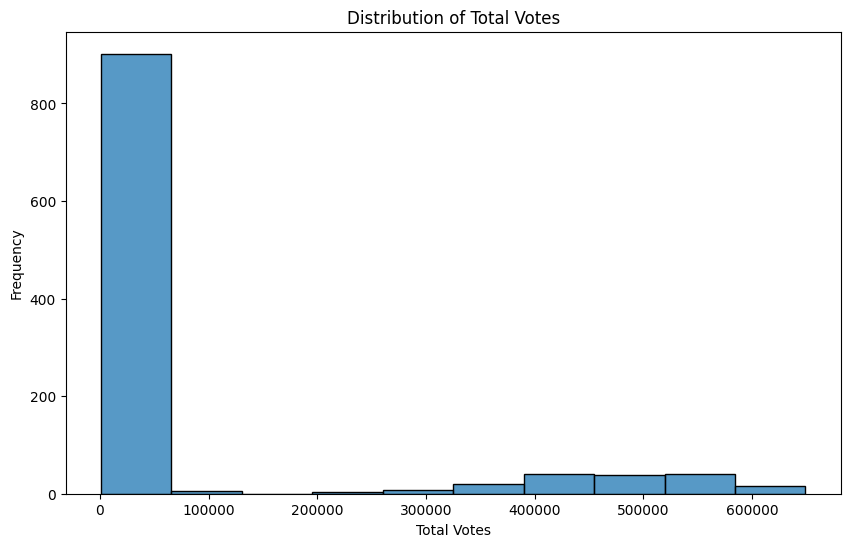

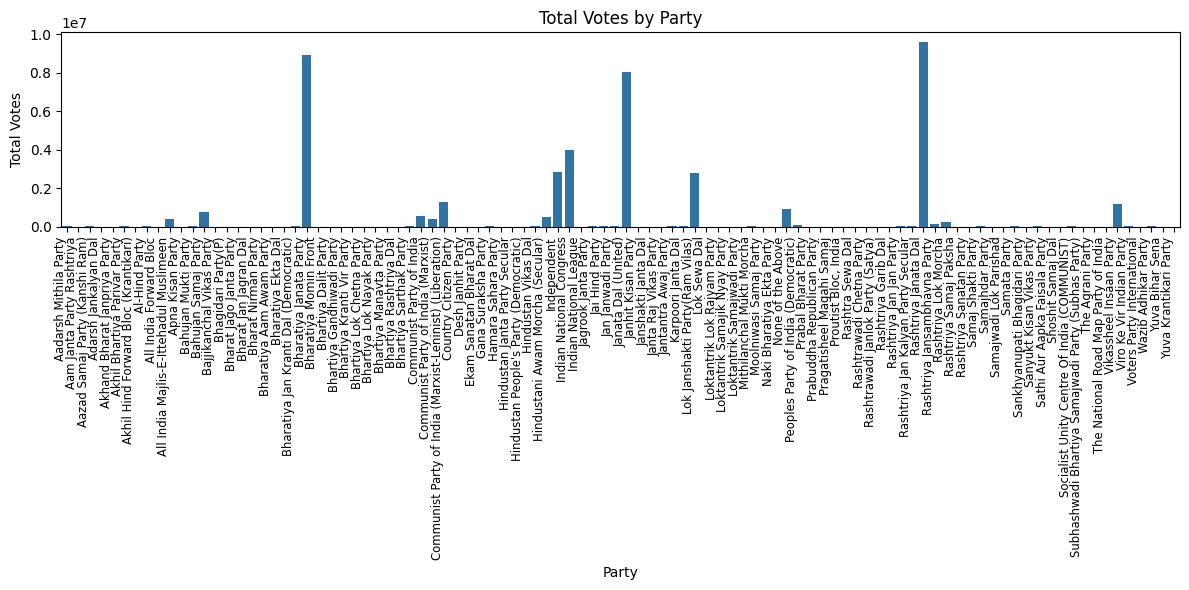

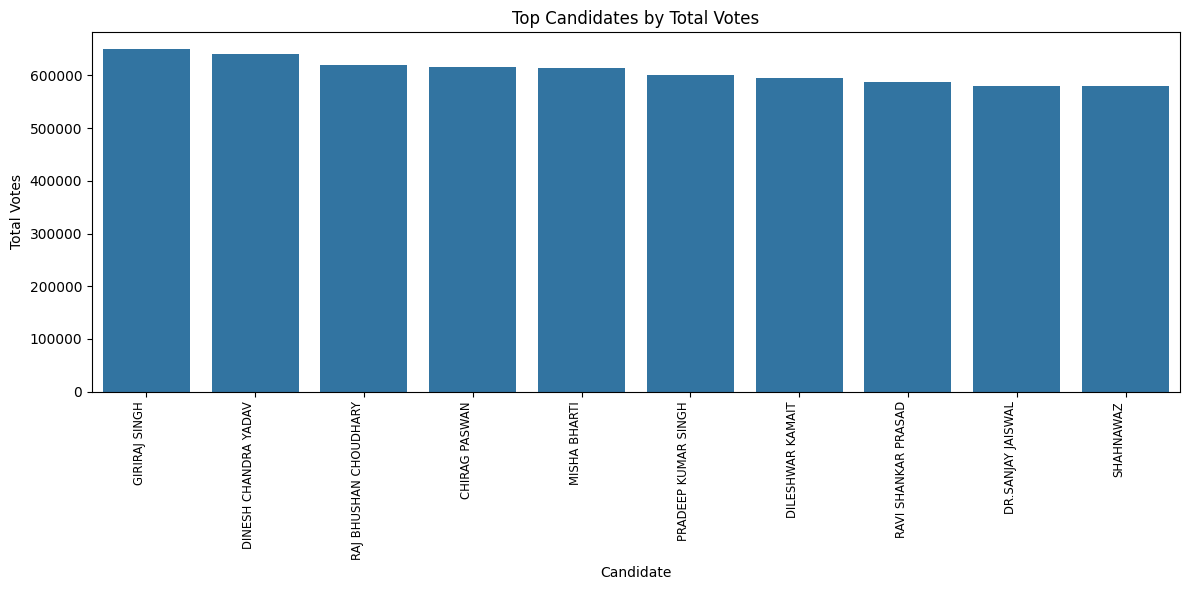

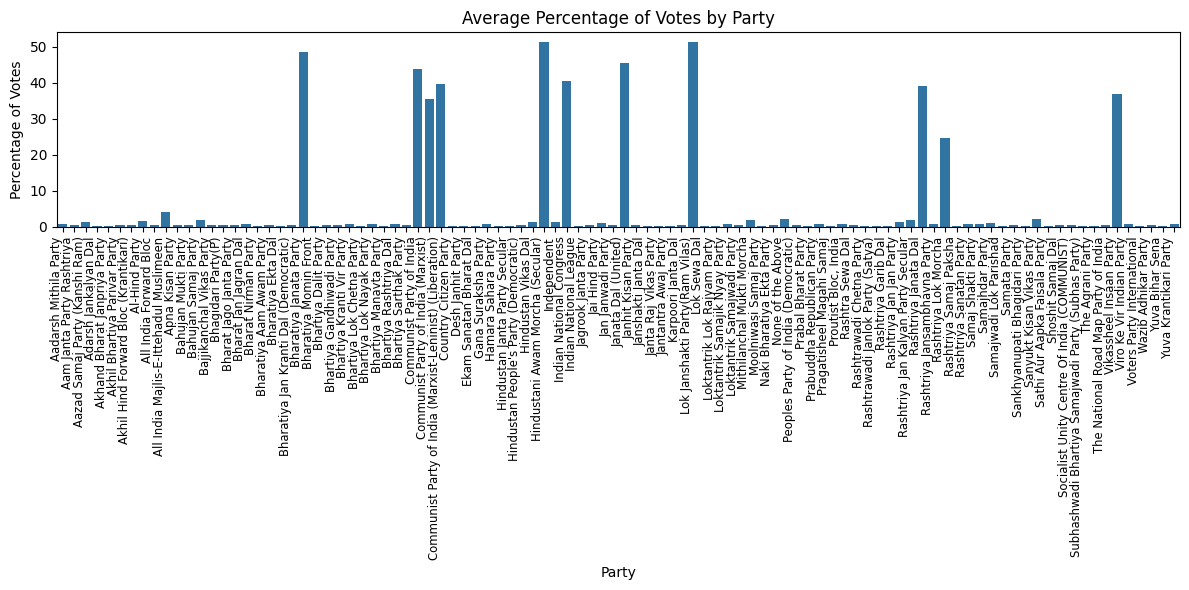

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder path containing CSV files
folder_path = r'C:\Users\Muskan\OneDrive\Desktop\Kalvium Task\Bihar'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

all_data = []

for file in csv_files:
    try:
        # Construct full file path
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Print first few rows for debugging
        print(f"Data from {file}:")
        print(df.head())
        
        # Convert all columns to strings to ensure .str accessor works
        df = df.astype(str)
        
        # Clean data
        df.dropna(inplace=True)
        
        # Replace non-numeric values with 0
        df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Total Votes'] = df['Total Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Percentage of votes'] = df['Percentage of votes'].str.replace('%', '').replace('-', '0').astype(float)
        
        # Append data to the list
        all_data.append(df)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all DataFrames into one
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Save the combined data to a new CSV file
    combined_df.to_csv('Combined_Election_Results.csv', index=False)

    # Perform Data Analysis and Visualization
    # Basic statistics
    print(combined_df.describe())

    # Distribution of total votes
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Total Votes'], bins=10)
    plt.title('Distribution of Total Votes')
    plt.xlabel('Total Votes')
    plt.ylabel('Frequency')
    plt.show()

    # Party-wise total votes
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Total Votes', data=party_votes)
    plt.title('Total Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right', fontsize='small')  # Rotate x-axis labels by 180 degrees and adjust font size
    plt.tight_layout()  # Ensure labels are not cut off
    plt.show()

    # Top candidates by total votes
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Candidate', y='Total Votes', data=top_candidates)
    plt.title('Top Candidates by Total Votes')
    plt.xlabel('Candidate')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=90, ha='right', fontsize='small')  # Rotate x-axis labels by 180 degrees and adjust font size
    plt.tight_layout()  # Ensure labels are not cut off
    plt.show()

    # Party-wise percentage of votes
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Percentage of votes', data=party_percentage)
    plt.title('Average Percentage of Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Percentage of Votes')
    plt.xticks(rotation=90, ha='right', fontsize='small')  # Rotate x-axis labels by 180 degrees and adjust font size
    plt.tight_layout()  # Ensure labels are not cut off
    plt.show()
else:
    print("No data to process.")
